<a href="https://colab.research.google.com/github/riyamendon99/CSE575-SML-Riya-Mendon/blob/main/HW1_RiyaMendon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***NAME: RIYA MENDON ASU ID: 1229584722***

# Linear regression [7 pts]

In this homework, you will implement solution algorithms for linear regression.


## Import libraries
Let's begin by importing some libraries.

In [ ]:
print(__doc__)
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
%matplotlib inline

Automatically created module for IPython interactive environment


## Load dataset

Now, we are importing a dataset of diabetes. You can check the details on this dataset here: https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset.

The dataset consists of 442 observations with 10 attributes ($X$) that may affect the progression of diabetes ($y$). Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of $n$ = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

In [ ]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
print('The shape of the input features:',diabetes_X.shape)
print('The shape of the output varaible:',diabetes_y.shape)

The shape of the input features: (442, 10)
The shape of the output varaible: (442,)


We will choose just one attribute from the ten attributes as an input variable.

In [ ]:
# Use only one feature
diabetes_X_one = diabetes_X[:, np.newaxis, 2]
print(diabetes_X_one.shape)

(442, 1)


## Dataset split

Now, we split the dataset into two parts: training set and test set.

- training set: 422 samples
- test set: 20 samples

In [ ]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X_one[:-20]
diabetes_X_test = diabetes_X_one[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

print('Training input variable shape:', diabetes_X_train.shape)
print('Test input variable shape:', diabetes_X_test.shape)

Training input variable shape: (422, 1)
Test input variable shape: (20, 1)


## Linear regression

Assume that we have a hypothesis $$ h_{\theta}(x) = \theta_0 + \theta_1 x. $$

Your tasks:

- [3pts] implement \textbf{your own version} of the method of least-squares, compute and report $\theta_0$ and $\theta_1$ that minimize the residual sum of squares, )
$$ \sum_{i=1}^{N} \frac{1}{2}( y^{(i)} - h_{\theta}(x^{(i)})^2$$

[IMPORTANT] Do not just call the least square function from libraries, for example,
scipy.optimize.least_squares from scipy. Doing so will result in 0 point. Using helping functions such as numpy.linalg.inv is okay.

- [3pts] implement your own version of the gradient descent algorithm, compute and report $\theta_0$ and $\theta_1$ that minimize the mean squared error $$ \sum_{i=1}^{N} \frac{1}{N}( y^{(i)} - h_{\theta}(x^{(i)})^2$$

[NOTE] Notice that the loss function is mean-squared error.

- [1pts] derive the analytical expression of the gradient if the loss is defined as
$$ \sum_{i=1}^{N} \frac{1}{2}( y^{(i)} - h_{\theta}(x^{(i)})^2 + \frac{\lambda}{2} \| \theta \|_2^2, $$
where $\theta = [\theta_0, \theta_1]^{\intercal}$

To check whether your computation is correct, consider using an API such as Scikit learn linearregression.

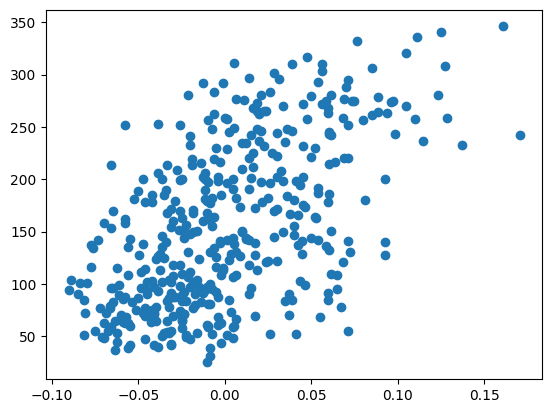

In [ ]:
#Plotting a graph to visualize the training dataset
plt.scatter(diabetes_X_train, diabetes_y_train)
plt.show()

Answer to Question 1 below

In [ ]:
#Initializing a matrix with zeros in column 1 and training values in colum 2 and transposing the matrix.
diabetes_X_train_matrix = np.insert(diabetes_X_train,0,values=1,axis=1)
diabetes_X_train_matrix_transpose = diabetes_X_train_matrix.transpose()


#Computing the values of theta0 and theta1 to achieve minimum residual sum of squares
product_1 = np.dot(diabetes_X_train_matrix_transpose, diabetes_X_train_matrix)
inverse = np.linalg.inv(product_1)
product_2 = np.dot(diabetes_X_train_matrix_transpose, diabetes_y_train)
theta = np.dot(inverse, product_2)
print("theta0 is ", theta[0])
print("theta1 is ", theta[1])

theta0 is  152.91886182616113
theta1 is  938.2378612513525


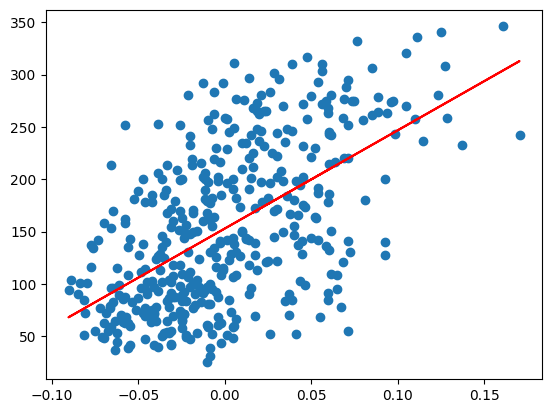

In [ ]:
#Plotting the results
plt.scatter(diabetes_X_train, diabetes_y_train) #represents the actual data points
plt.plot(diabetes_X_train, theta[0] + theta[1]*diabetes_X_train, color = 'red') #represents the prediction

In [ ]:
#checking the correctness of the computation using Scikit learn linear regression
from sklearn.linear_model import LinearRegression
regr = LinearRegression().fit(diabetes_X_train, diabetes_y_train)
print("theta0 is ", regr.intercept_)
print("theta1 is ", regr.coef_)

theta0 is  152.91886182616113
theta1 is  [938.23786125]


Answer to Question 2 below

In [ ]:
theta = [0,0] #initializing theta values to zero
learning_rate = 0.1
iterations = 1000000
n = len(diabetes_X_train_matrix) #n is the number of observations
X = diabetes_X_train_matrix
Y = diabetes_y_train

#Looping through until we find theta that minimizes the mean squared error
for i in range(iterations):
  #calculating the prediction
  Y_prediction = np.dot(X, theta)
  #finding the error by subtracting the prediction with the actual
  error = Y_prediction - Y
  #calculating the gradient
  gradient = (1/n) * X.T.dot(error)
  #moving a step to reach the minimum theta
  theta = theta - learning_rate*gradient
print("theta0 is ", theta[0])
print("theta1 is ", theta[1])

theta0 is  152.9188618261614
theta1 is  938.2378612511006


Answer to Question 3 below